<h1 style='font-size:40px'> Time Series Basics</h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Seção introdutória em que aprendemos os principais conceitos e técnicas de análises de séries temporais.
        </li>
    </ul>
 </div>

<h2 style='font-size:30px'> 
    What is a Time Series?
</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Nesse curso, lidaremos com séries de dados distribuídas em intervalos de tempo discretos.
        </li>
        <li>
            Também lidaremos com múltiplas séries contidas no mesmo intervalo, caso conhecido como "Vector Time Series".
        </li>
    </ul>
 </div>

<figure>
    <center style='font-size:20px;margin-top:20px'> 
           <img src='img/03_vector_series.png'>
        <figcaption style='font-size:15px'>
            Exemplo de uma vector time series.
        </figcaption>
    </center>
</figure>

<h2 style='font-size:30px'> 
    Why Do We Care About Shapes?
</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Os frameworks que vamos utilizar nesse curso esperam que cada série temporal seja armazenada como um vetor-coluna. Nesse sentido, caso trabalhemos com múltiplas séries contidas no mesmo período, cada timestamp será um vetor-linha, e cada série um vetor-coluna.
        </li>
    </ul>
 </div>

<h3 style='font-size:30px;font-style:italic'> Séries 3-D</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Existe a possibilidade de trabalharmos com séries contidas em matrizes tridimensionais. Por exemplo, poderíamos querer treinar um previsor de frequência cardíaca e nível de oxigênio de uma pessoa com base em 100 amostras de 500 timestamps.
        </li>
        <li>
            Nesse caso, os frameworks demandariam que nossa matriz ficasse da forma $100\times{500}\times{2}$.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> 
    Types of Tasks
    
</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Aula em que mencionamos as principais atividades que envolvem análises de séries temporais.
        </li>
    </ul>
 </div>

<h3 style='font-size:30px;font-style:italic'> One-Step Forecast</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Geração de um modelo que prevê o valor da série um time-step para frente. Modalidade suportada por modelos como o ARIMA.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Multi-Step Forecast</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Previsão da série para múltiplos time-steps para frente. Pode ser implementada usando um modelo one-step alimentado por suas próprias previsões, ou algoritmos especializados para essa atividade.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Classification</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Realização de uma classificação com base nos padrões de séries temporais. Pode envolver cases de detecção de doenças cardíacas, ou ausência de capacity em infras.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> 
    Power, Log, and Box-Cox Transformations
    
</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Em projetos de TSA, podemos aplicar transformações sobre a nossa série visando facilitar o aprendizado de nossos modelos. 
        </li>
    </ul>
 </div>

<h3 style='font-size:30px;font-style:italic'> Power Transform</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Consiste em elevar os componentes da série a uma potência $\alpha$. Fazemos isso, porque grande parte dos modelos pressupõe séries de crescimento linear com o passar do tempo.
        </li>
    </ul>
</div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $y'(t)=y(t)^{\alpha}$
        <figcaption></figcaption>
        </figure>
    </center>

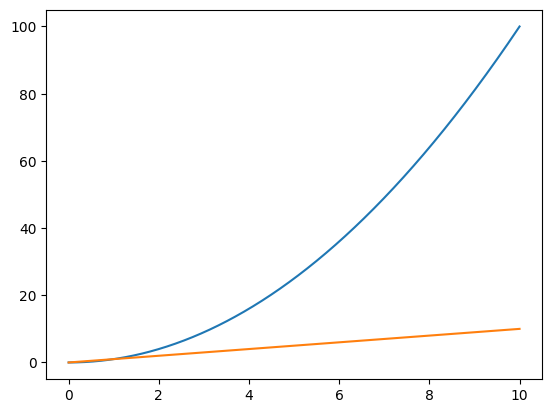

In [18]:
# Transformando uma série quadrática em linear.
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,1001)
y = x**2
y_ = y ** (1/2)

plt.plot(x,y)
plt.plot(x,y_)

<h3 style='font-size:30px;font-style:italic'>  Log Transform</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Consiste em tirar o log natural dos componentes. Assume que a distribuição seja log-normal.
        </li>
        <li>
            Muito utilizada com séries financeiras. Ela é aplicada no modelo Black-Scholes, por exemplo.
        </li>
    </ul>
</div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $y'(t)=\log{[y(t)+1]}$
        <figcaption style='font-size:15px'>
            Podemos somar 1 ao valor da série para permitirmos números negativos.
        </figcaption>
        </figure>
    </center>

<h3 style='font-size:30px;font-style:italic'>  Box-Cox Transform</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Transformação que mistura a exponencial com a logaritmica. 
        </li>
        <li>
            Sua intenção é conseguir aproximar a distribuição da série numa Normal.
        </li>
    </ul>
</div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $y'(t)=\frac{y(t)^{\lambda}-1}{\lambda}$
        <figcaption style='font-size:15px'>
        </figcaption>
        </figure>
    </center>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> $\lambda=0$</h4>
<div> 
    <ul style='font-size:20px'> 
        <li>
            O valor da Box-Cox será $\ln{y(t)}$, quando $\lambda=0$. Segue a prova abaixo:
        </li>
        <li>
            Seja $f(\lambda)=x^{\lambda}$, podemos entender $\displaystyle\lim_{\lambda\to{0}}{\frac{x^{\lambda}-1}{\lambda}}$ como $f'(0)$.
        </li>
    </ul>
</div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $$\displaystyle \begin{align*}
                f'(0)&=\lim_{\lambda\to 0}\frac{f(\lambda)-f(0)}{\lambda}\\
                     &=\lim_{\lambda\to 0}\frac{f(\lambda)-1}{\lambda} \text{    [f(0)=1]}
            \end{align*}$$
        <figcaption style='font-size:15px'>
        </figcaption>
        </figure>
    </center>

<div> 
    <ul style='font-size:20px'> 
        <li>
            Considerando que podemos escrever $f(\lambda)=x^{\lambda}=e^{\lambda\ln{x}}$, a função de sua derivada pode ser escrita como $f'(\lambda)=e^{\lambda\ln{x}}\ln{x}=\ln{x}\cdot x^{\lambda}$.
        </li>
        <li>
            Com isso conseguimos definir $f'(0)=\ln{x}\cdot x^{0}=\ln{x}$.
        </li>
    </ul>
</div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $\displaystyle \therefore \lim_{\lambda \to 0}\frac{x^{\lambda}-1}{\lambda}=\ln{x}$
        <figcaption style='font-size:15px'>
        </figcaption>
        </figure>
    </center>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> $\lambda$ Ideal</h4>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Diversos estudos foram conduzidos, a fim de montar uma metodologia que encontrasse o melhor valor de $\lambda$ para a transformação.
        </li>
        <li>
            Como o objetivo da Box-Cox é normalizar a distribuição, as publicações tendem a usar testes estatísticos como Shapiro-Wilk em suas abordagens.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> 
    Forecasting Metrics
    
</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Aula em que são apresentadas as principais métricas do campo de TSA.
        </li>
        <li>
            Por se tratar de cases de regressão, todas as métricas clássicas, como RMSE e MAE, são utilizadas. Porém, algumas a mais merecem menção.
        </li>
    </ul>
 </div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> 
    <a href='https://builtin.com/data-science/adjusted-r-squared'>$R^{2}$</a>    
</h4>
<div> 
    <ul style='font-size:20px'> 
        <li>
            A $R^{2}$ é uma métrica com o foque em expor o grau de variância da variável target que consegue ser explicada pelo modelo sob avaliação.
        </li>
    </ul>
</div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $\displaystyle R^{2}=\frac{SS_{\text{explained}}}{SS_{\text{total}}}=\frac{\sum_{i=1}^{n}(\hat{y}_{i}-\overline{y})}{\sum_{i=1}^{n}(y_{i}-\overline{y})}$
        <figcaption style='font-size:15px'>
        </figcaption>
        </figure>
    </center>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> 
    Mean Absolute Percentage Error (MAPE)
</h4>
<div> 
    <ul style='font-size:20px'> 
        <li>
            A MAPE corresponde à diferença percentual entre a target e a previsão do modelo. Ela foi criada com a intenção de ser agnóstica à escala da variável dependente. 
        </li>
    </ul>
</div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $\displaystyle \operatorname{MAPE}=\frac{1}{N}{\sum_{i=1}^{N}\left|\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right|}$
        <figcaption style='font-size:15px'>
        </figcaption>
        </figure>
    </center>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> 
   Symmetric Mean Absolute Percentage Error (sMAPE)
</h4>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Alguns criticam a MAPE por não ser uma métrica simétrica. Por exemplo, o MAPE de $y_{i}=10$ e $\hat{y}_{i}=11$ não é o mesmo do de $y_{i}=11$ e $\hat{y}_{i}=10$
        </li>
        <li>
            Tendo isso em vista, sMAPE surge como uma medida agnóstica à ordem dos argumentos. 
        </li>
    </ul>
</div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $\displaystyle \operatorname{sMAPE}=\frac{1}{N}{\sum_{i=1}^{N}\frac{\left|y_{i}-\hat{y}_{i}\right|}{(|y_{i}|+|\hat{y}_{i}|)/2}}$
        <figcaption style='font-size:15px'>
        </figcaption>
        </figure>
    </center>

<h2 style='font-size:30px'> 
    Random Walks and the Random Walk Hypothesis
</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Random Walk Hypothesis é uma teoria do mercado financeiro sobre valores de ações. Ela afirma que mudanças nos preços de ativos não podem ser previstas com base em comportamentos passados. 
        </li>
        <li>
            Para a teoria, as variações de preço nada mais são do que variáveis aleatórias independentes e igualmente distribuídas.
        </li>
        <li>
            Usualmente, assumimos que as variações de preço seguem uma Distribuição Normal. Isso se deve ao fato de que uma amostra das médias de preço seguirem essa distribuição, condizendo ao CLT. 
        </li>
    </ul>
 </div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $\displaystyle p_{n}=p_{n-1}+e_{n},\text{ } e_{n}~N(0,\sigma^{2})$
        <figcaption style='font-size:15px'>
            Definição de um valor num dado time-step, segunda a Random Walk Hypothesis.
        </figcaption>
        </figure>
    </center>

<h3 style='font-size:30px;font-style:italic'>  Gaussian Random Walk</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Uma consequência de as variações serem normais padrão é que podemos considerar $x_{t}~N(x_{t-1}, \sigma^{2})$.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> How Confident Are We?</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            A partir da assunção da Random Walk Hypothesis, podemos concluir que as previsões se tornam cada vez mais incertas, conforme tentamos estimar a target em muitos steps para frente.
        </li>
        <li>
            Isso porque, se desejamos estimar o valor da série em $\tau$ time steps para frente, a variância da soma dos noises aleatórios independentes será de $\tau\times{\sigma^{2}}$. 
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> 
    The Naive Forecast and the Importance of Baselines
</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Naïve Forecast consiste em uma técnica de predição usada como baseline de projetos de TSA. 
        </li>
        <li>
            Basicamente, o método consiste em prever o último valor da série. Isso faz com que a série prevista nada mais seja do que a $y$ deslocada um time-step para trás.
        </li>
    </ul>
 </div>

 <center style='font-size:20px;margin-top:20px'> 
        <figure>
            $\displaystyle \hat{y}_{t}=y_{t-1}$
        <figcaption style='font-size:15px'>
            Definição da previsão do Naïve Forecast.
        </figcaption>
        </figure>
    </center>

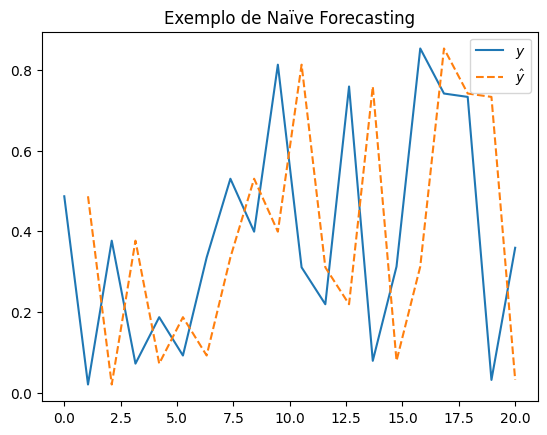

In [14]:
import matplotlib.pyplot as plt
import numpy as np

length = 20

x = np.linspace(0,length, length)
y = np.random.rand(length)
y_pred = y[:-1]

plt.title('Exemplo de Naïve Forecasting')
plt.plot(x,y)
plt.plot(x[1:], y_pred, ls='--')
plt.legend(('$y$','$\hat{y}$'))

In [1]:
! git add .
! git commit -am 'Aula 18'
! git push

[master b9caf5e] Definir "Mutually independent random vectors"
 1 file changed, 46 insertions(+), 15 deletions(-)


failed to send, dropping 1 traces to intake at http://localhost:8126/v0.5/traces after 3 retries


Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 24 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 942 bytes | 942.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/felipesveiga/time-series.git
   b31fc45..b9caf5e  master -> master


<p style='color:red'> Defini "Mutually independent random vectors"; Vi Aula 16 e 17; Aula 18